In [435]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [436]:
data = pd.read_csv('full.csv')
print(data.shape)
print(data.head())
socMon = data['socMon']
btSoc = data['btSoc']
#data.drop(['socMon', 'btSoc', 'Unnamed: 5'], axis=1, inplace=True)
print(data.shape)
print(data.head())

(1005, 6)
   vbatt  ibatt tempr socMon btSoc  Unnamed: 5
0    389     25  005e     93  96f0         NaN
1    391     12  0078     98  9bf0         NaN
2    374     55  0036     00  64f0         NaN
3    376     45  003f     00  6c70         NaN
4    399     11  0067     ad  aff0         NaN
(1005, 6)
   vbatt  ibatt tempr socMon btSoc  Unnamed: 5
0    389     25  005e     93  96f0         NaN
1    391     12  0078     98  9bf0         NaN
2    374     55  0036     00  64f0         NaN
3    376     45  003f     00  6c70         NaN
4    399     11  0067     ad  aff0         NaN


### Features represented in respective units
 - vbatt in volt
 - ibatt in Amp
 - tempr in Celsius
 



In [437]:
data['vbatt'] = data['vbatt'].apply(lambda x: x * 1.0/100.0)
data['ibatt'] = data['ibatt'].apply(lambda x: x * 1.0/100.0)
data['tempr'] = data['tempr'].apply(lambda x: int(x, 16)/4.0)
print(data.head())

   vbatt  ibatt  tempr socMon btSoc  Unnamed: 5
0   3.89   0.25  23.50     93  96f0         NaN
1   3.91   0.12  30.00     98  9bf0         NaN
2   3.74   0.55  13.50     00  64f0         NaN
3   3.76   0.45  15.75     00  6c70         NaN
4   3.99   0.11  25.75     ad  aff0         NaN


### Target values in correct ranges
 - socMon and btSoc from 0.0 to 1.0

In [438]:
print(socMon.head())
print(btSoc.head())
socMon = socMon.apply(lambda x: int(x, 16)/255.0)
btSoc = btSoc.apply(lambda x: int(x, 16)/pow(2, 16))
data['socMon'] = data['socMon'].apply(lambda x: int(x, 16)/255.0)
data['btSoc'] = data['btSoc'].apply(lambda x: int(x, 16)/pow(2, 16))
print(socMon.head())
print(btSoc.head())
print(data.head(10))
print(data.describe())



0    93
1    98
2    00
3    00
4    ad
Name: socMon, dtype: object
0    96f0
1    9bf0
2    64f0
3    6c70
4    aff0
Name: btSoc, dtype: object
0    0.576471
1    0.596078
2    0.000000
3    0.000000
4    0.678431
Name: socMon, dtype: float64
0    0.589600
1    0.609131
2    0.394287
3    0.423584
4    0.687256
Name: btSoc, dtype: float64
   vbatt  ibatt  tempr    socMon     btSoc  Unnamed: 5
0   3.89   0.25  23.50  0.576471  0.589600         NaN
1   3.91   0.12  30.00  0.596078  0.609131         NaN
2   3.74   0.55  13.50  0.000000  0.394287         NaN
3   3.76   0.45  15.75  0.000000  0.423584         NaN
4   3.99   0.11  25.75  0.678431  0.687256         NaN
5   3.83   0.14  38.00  0.501961  0.501709         NaN
6   3.75   0.39  37.00  0.372549  0.394287         NaN
7   4.07   0.34  31.50  0.788235  0.794678         NaN
8   4.15   0.19  24.75  0.850980  0.853271         NaN
9   4.19   0.47  38.25  0.909804  0.911865         NaN
             vbatt        ibatt        tempr       so

### Describe the features

In [439]:
print(np.min(socMon), np.mean(socMon), np.max(socMon), np.median(socMon), np.std(socMon))

0.0 0.5380509218612815 0.933333333333 0.607843137255 0.2722766754164631


### Plot individual features vs. target

   vbatt  ibatt  tempr    socMon     btSoc  Unnamed: 5
0   3.89   0.25  23.50  0.576471  0.589600         NaN
1   3.91   0.12  30.00  0.596078  0.609131         NaN
2   3.74   0.55  13.50  0.000000  0.394287         NaN
3   3.76   0.45  15.75  0.000000  0.423584         NaN
4   3.99   0.11  25.75  0.678431  0.687256         NaN


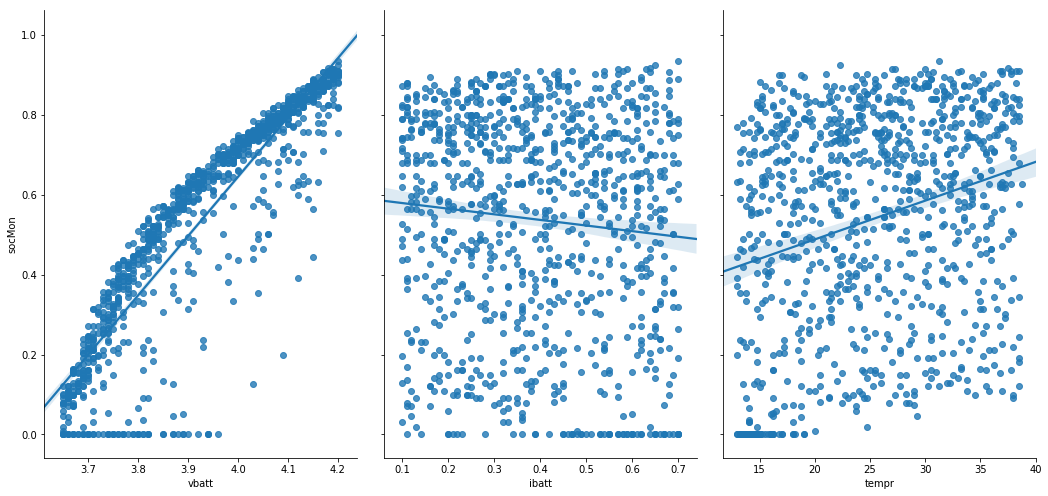

In [440]:
sns.pairplot(data, x_vars=['vbatt', 'ibatt', 'tempr'], y_vars='socMon', size = 7, aspect = 0.7, kind='reg')
#sns.pairplot(data, x_vars=['ibatt'], y_vars='socMon', size = 10, aspect = 0.8, kind='reg', hue='ibatt')
#sns.pairplot(data, x_vars=['tempr'], y_vars='socMon', size = 10, aspect = 0.8, kind='reg', hue='tempr')
#sns.pairplot(data, x_vars=['vbatt', 'ibatt', 'tempr'], y_vars='btSoc', size = 7, aspect = 0.7, kind='reg')
full_data = data.copy()
print(full_data.head())
#data.drop(['socMon', 'btSoc', 'Unnamed: 5'], axis=1, inplace=True)
data.drop(['Unnamed: 5'], axis=1, inplace=True)

### To again  show relation betw each feature and SoC, using subset of data

(1005, 6)
    vbatt  ibatt  tempr    socMon     btSoc  Unnamed: 5
3    3.76   0.45  15.75  0.000000  0.423584         NaN
6    3.75   0.39  37.00  0.372549  0.394287         NaN
7    4.07   0.34  31.50  0.788235  0.794678         NaN
9    4.19   0.47  38.25  0.909804  0.911865         NaN
11   4.12   0.34  17.75  0.815686  0.843506         NaN
14   3.82   0.41  30.25  0.501961  0.521240         NaN
18   3.71   0.41  23.50  0.227451  0.267334         NaN
21   3.70   0.37  38.50  0.192157  0.218506         NaN
22   3.81   0.44  17.25  0.203922  0.511475         NaN
26   3.65   0.49  16.25  0.000000  0.150146         NaN
(347, 6)


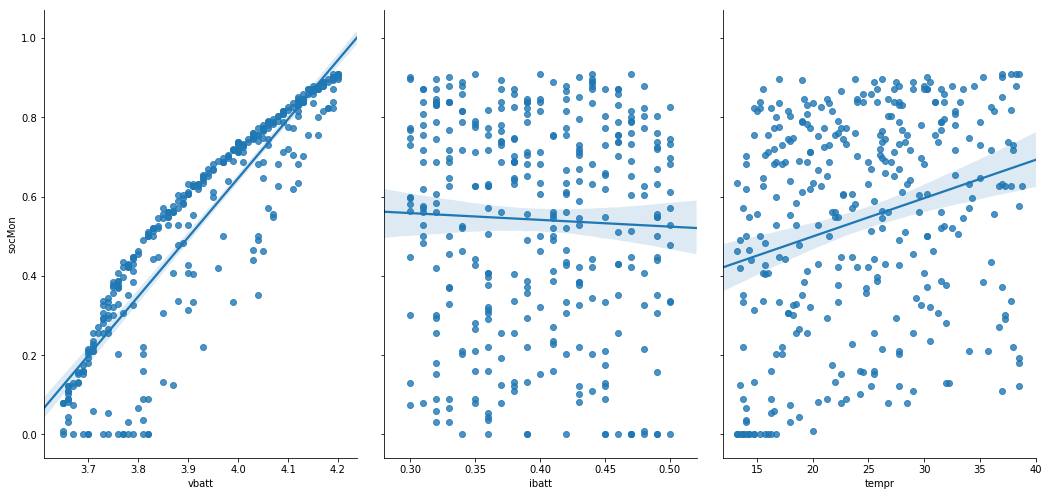

In [441]:
print(full_data.shape)
full_data.drop(full_data[full_data.ibatt > 0.5].index, inplace=True)
full_data.drop(full_data[full_data.ibatt < 0.3].index, inplace=True)
print(full_data.head(10))
print(full_data.shape)
sns.pairplot(full_data, x_vars=['vbatt', 'ibatt', 'tempr'], y_vars='socMon', size = 7, aspect = 0.7, kind='reg')

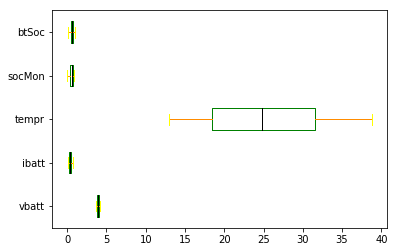

In [442]:
color = dict(boxes='Green', whiskers='DarkOrange', medians='Black', caps='Yellow')
data.plot.box(color=color, sym='r+', vert=False)

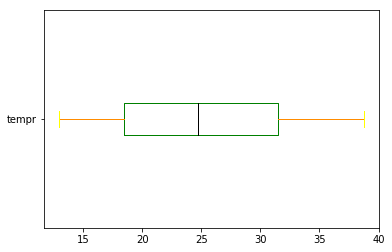

In [443]:
data['tempr'].plot.box(color=color, sym='r+', vert=False)

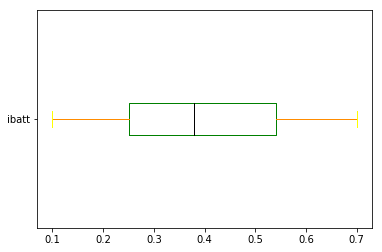

In [444]:
data['ibatt'].plot.box(color=color, sym='r+', vert=False)

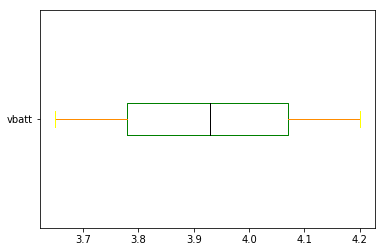

In [445]:
data['vbatt'].plot.box(color=color, sym='r+', vert=False)

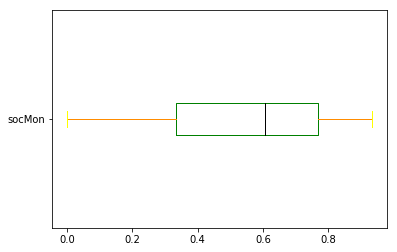

In [446]:
data['socMon'].plot.box(color=color, sym='r+', vert=False)

(1005, 5)
[ 0.2514883   0.01266488  0.96494313  0.05203125  0.05263781]
vbatt      4.170000
ibatt      0.210000
tempr     16.000000
socMon     0.862745
btSoc      0.872803
Name: 230, dtype: float64


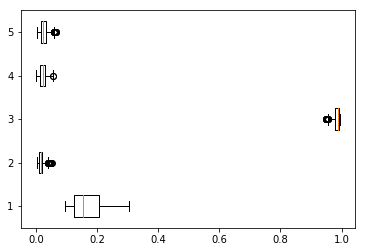

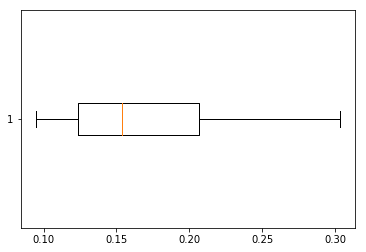

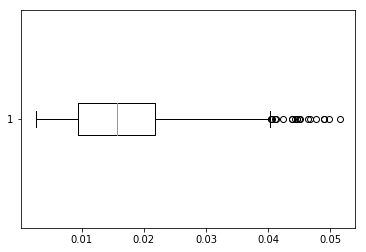

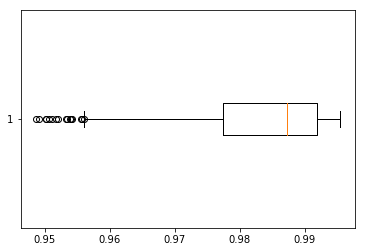

In [447]:
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data)
print(normalized_data.shape)
print(normalized_data[230])
print(data.iloc[230])
vs.dobox(normalized_data)
vs.dobox(normalized_data[:,0])
vs.dobox(normalized_data[:,1])
vs.dobox(normalized_data[:,2])


### Normalized and Scaled features
- The box plots below show that both, the features as well as target (socMon), lie in similar ranges and with mean close or equal to zero


(1005, 5)


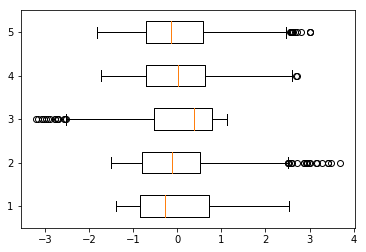

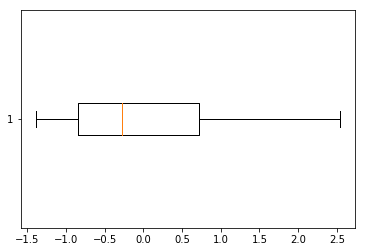

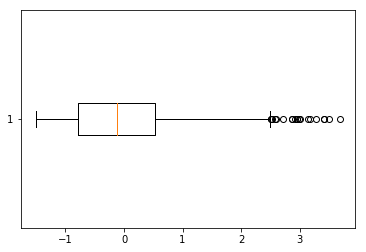

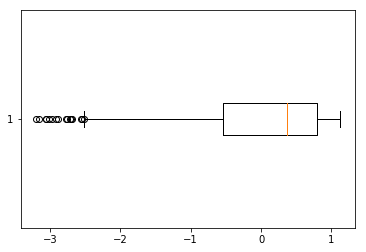

Below is boxplot for the target variable socMon:


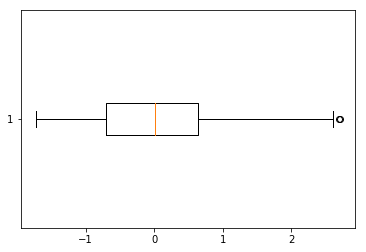

In [448]:
normAndScaled_data = preprocessing.scale(normalized_data)
print(normAndScaled_data.shape)
vs.dobox(normAndScaled_data)
vs.dobox(normAndScaled_data[:,0])
vs.dobox(normAndScaled_data[:,1])
vs.dobox(normAndScaled_data[:,2])
print("Below is boxplot for the target variable socMon:")
vs.dobox(normAndScaled_data[:,3])



In [449]:
socMon = normAndScaled_data[:,3]
btSoc = normAndScaled_data[:,4]
print(type(socMon))
print(type(normAndScaled_data))
print(normAndScaled_data.shape)
print(normAndScaled_data)
normAndScaled_data = np.delete(normAndScaled_data, [3, 4], 1)  # delete 3rd and 4th cols
print(normAndScaled_data)
print(normAndScaled_data.shape)
print(type(normAndScaled_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1005, 5)
[[-0.09864681 -0.66905671  0.24638056  0.17569613 -0.11612949]
 [-0.73859958 -1.36071149  0.73447982 -0.17736261 -0.46778203]
 [ 1.84797571  2.37666225 -1.91130346 -1.7257088   0.14146093]
 ..., 
 [ 1.12211107  0.82121058 -0.96504771 -0.9689771   0.2880361 ]
 [ 0.08223199  0.70329648  0.00716545  1.09955847  0.78279287]
 [ 1.74524898  1.55306019 -1.90104672  1.08400903  1.98285068]]
[[-0.09864681 -0.66905671  0.24638056]
 [-0.73859958 -1.36071149  0.73447982]
 [ 1.84797571  2.37666225 -1.91130346]
 ..., 
 [ 1.12211107  0.82121058 -0.96504771]
 [ 0.08223199  0.70329648  0.00716545]
 [ 1.74524898  1.55306019 -1.90104672]]
(1005, 3)
<class 'numpy.ndarray'>


In [450]:
print(socMon)
print(socMon.shape)

[ 0.17569613 -0.17736261 -1.7257088  ..., -0.9689771   1.09955847
  1.08400903]
(1005,)


### At this point, the features are cleaned and stored in the 1005x3 numpy array - normAndScaled_data. Target is stored in the 1005x1 numpy array socMon
### Do train-test split

In [451]:
# test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normAndScaled_data, socMon, test_size=0.20, random_state=1729)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(804, 3)
(804,)
(201, 3)
(201,)


### Build a linear regr model to explore possibilities

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
print(X_train)
print(X_train[:,0].shape)
vbat_X_train = X_train[:, np.newaxis, 0]
print(vbat_X_train.shape)
vbat_X_test = X_test[:, np.newaxis, 0]
print(vbat_X_test.shape)
#print(vbat_X_train)

regr = linear_model.LinearRegression()
regr.fit(vbat_X_train, y_train)
y_pred = regr.predict(vbat_X_test)

print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print('Variance (i.e, r2) score: %.3f' % r2_score(y_test, y_pred))



### Plot results of basic 1-feature lin regr model

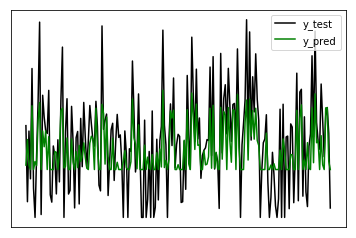

In [452]:
import matplotlib.pyplot as plt
# Plot outputs
#plt.scatter(vbat_X_test, y_test,  color='black')
#plt.plot(vbat_X_test, y_pred, color='blue', linewidth=2)
plt.plot(y_test, color="black", label='y_test')
plt.plot(y_pred, color="green", label='y_pred')
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()


### The results are quite a low value of r2

### Build a NN

In [453]:
import model_utils as utils
from keras.callbacks import ModelCheckpoint  

model1 = utils.make_model()
model1.summary()

# Compile model
model1.compile(loss='mean_squared_error', optimizer='sgd')
checkpointer = ModelCheckpoint(filepath='saved_models/best.model1.hdf5', 
                               verbose=1, save_best_only=True)

train_log = model1.fit(X_train, y_train, epochs=300,
                      validation_split=0.1, verbose=2, callbacks=[checkpointer])

model1.load_weights('saved_models/best.model1.hdf5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 64)                256       
_________________________________________________________________
dropout_77 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_105 (Dense)            (None, 128)               8320      
_________________________________________________________________
dropout_78 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_79 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_107 (Dense)            (None, 32)                2080      
__________

0s - loss: 0.9691 - val_loss: 1.1386
Epoch 67/300
Epoch 00066: val_loss did not improve
0s - loss: 0.9679 - val_loss: 1.1453
Epoch 68/300
Epoch 00067: val_loss did not improve
0s - loss: 0.9677 - val_loss: 1.1458
Epoch 69/300
Epoch 00068: val_loss did not improve
0s - loss: 0.9677 - val_loss: 1.1442
Epoch 70/300
Epoch 00069: val_loss did not improve
0s - loss: 0.9681 - val_loss: 1.1442
Epoch 71/300
Epoch 00070: val_loss did not improve
0s - loss: 0.9676 - val_loss: 1.1432
Epoch 72/300
Epoch 00071: val_loss did not improve
0s - loss: 0.9668 - val_loss: 1.1417
Epoch 73/300
Epoch 00072: val_loss did not improve
0s - loss: 0.9673 - val_loss: 1.1420
Epoch 74/300
Epoch 00073: val_loss did not improve
0s - loss: 0.9671 - val_loss: 1.1451
Epoch 75/300
Epoch 00074: val_loss did not improve
0s - loss: 0.9665 - val_loss: 1.1407
Epoch 76/300
Epoch 00075: val_loss improved from 1.13857 to 1.13714, saving model to saved_models/best.model1.hdf5
0s - loss: 0.9664 - val_loss: 1.1371
Epoch 77/300
Epoch 

Epoch 00132: val_loss did not improve
0s - loss: 0.8255 - val_loss: 0.8869
Epoch 134/300
Epoch 00133: val_loss improved from 0.88101 to 0.87952, saving model to saved_models/best.model1.hdf5
0s - loss: 0.8189 - val_loss: 0.8795
Epoch 135/300
Epoch 00134: val_loss did not improve
0s - loss: 0.8249 - val_loss: 0.9005
Epoch 136/300
Epoch 00135: val_loss did not improve
0s - loss: 0.8175 - val_loss: 0.8819
Epoch 137/300
Epoch 00136: val_loss did not improve
0s - loss: 0.7965 - val_loss: 0.9027
Epoch 138/300
Epoch 00137: val_loss improved from 0.87952 to 0.87150, saving model to saved_models/best.model1.hdf5
0s - loss: 0.7996 - val_loss: 0.8715
Epoch 139/300
Epoch 00138: val_loss improved from 0.87150 to 0.86416, saving model to saved_models/best.model1.hdf5
0s - loss: 0.8129 - val_loss: 0.8642
Epoch 140/300
Epoch 00139: val_loss did not improve
0s - loss: 0.8098 - val_loss: 0.8836
Epoch 141/300
Epoch 00140: val_loss did not improve
0s - loss: 0.8296 - val_loss: 0.8763
Epoch 142/300
Epoch 0

Epoch 00217: val_loss did not improve
0s - loss: 0.7545 - val_loss: 0.8326
Epoch 219/300
Epoch 00218: val_loss did not improve
0s - loss: 0.7651 - val_loss: 0.8191
Epoch 220/300
Epoch 00219: val_loss did not improve
0s - loss: 0.7519 - val_loss: 0.8383
Epoch 221/300
Epoch 00220: val_loss did not improve
0s - loss: 0.7609 - val_loss: 0.8316
Epoch 222/300
Epoch 00221: val_loss did not improve
0s - loss: 0.7528 - val_loss: 0.8269
Epoch 223/300
Epoch 00222: val_loss did not improve
0s - loss: 0.7678 - val_loss: 0.8383
Epoch 224/300
Epoch 00223: val_loss did not improve
0s - loss: 0.7458 - val_loss: 0.8391
Epoch 225/300
Epoch 00224: val_loss did not improve
0s - loss: 0.7329 - val_loss: 0.8420
Epoch 226/300
Epoch 00225: val_loss did not improve
0s - loss: 0.7587 - val_loss: 0.8208
Epoch 227/300
Epoch 00226: val_loss did not improve
0s - loss: 0.7595 - val_loss: 0.8407
Epoch 228/300
Epoch 00227: val_loss did not improve
0s - loss: 0.7207 - val_loss: 0.8289
Epoch 229/300
Epoch 00228: val_loss

Epoch 00296: val_loss did not improve
0s - loss: 0.5199 - val_loss: 0.4339
Epoch 298/300
Epoch 00297: val_loss did not improve
0s - loss: 0.5466 - val_loss: 0.5594
Epoch 299/300
Epoch 00298: val_loss did not improve
0s - loss: 0.4835 - val_loss: 0.5995
Epoch 300/300
Epoch 00299: val_loss did not improve
0s - loss: 0.4939 - val_loss: 1.0202


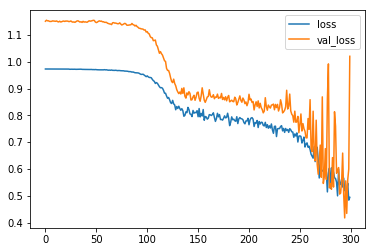

In [454]:
plt.plot(train_log.history["loss"], label="loss")
plt.plot(train_log.history["val_loss"], label="val_loss")
plt.legend()

In [455]:
y_pred = model.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance (i.e, r2) score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.139
Variance (i.e, r2) score: 0.865


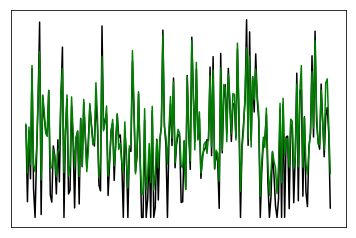

In [456]:
#plt.scatter(vbat_X_test, y_test,  color='black')
#plt.scatter(vbat_X_test, y_pred,  color='blue')
plt.plot(y_test, color="black")
plt.plot(y_pred, color="green")
plt.xticks(())
plt.yticks(())

plt.show()


### Above model has much better scores than benchmark model

### Next, refine the model

In [461]:
from keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=1e-6)
model2 = utils.make_model()
model2.summary()

# Compile model
model2.compile(loss='mean_squared_error', optimizer=sgd)
checkpointer = ModelCheckpoint(filepath='saved_models/best.model2.hdf5', 
                               verbose=1, save_best_only=True)
train_log = model2.fit(X_train, y_train, epochs=300, batch_size=8,
                       validation_split=0.1, verbose=2, callbacks=[checkpointer])
model2.load_weights('saved_models/best.model2.hdf5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 64)                256       
_________________________________________________________________
dropout_85 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_115 (Dense)            (None, 128)               8320      
_________________________________________________________________
dropout_86 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_87 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_117 (Dense)            (None, 32)                2080      
__________

Epoch 00063: val_loss did not improve
0s - loss: 0.7918 - val_loss: 0.9679
Epoch 65/300
Epoch 00064: val_loss did not improve
0s - loss: 0.7898 - val_loss: 0.8449
Epoch 66/300
Epoch 00065: val_loss did not improve
0s - loss: 0.7814 - val_loss: 0.9557
Epoch 67/300
Epoch 00066: val_loss improved from 0.82846 to 0.80107, saving model to saved_models/best.model2.hdf5
0s - loss: 0.7743 - val_loss: 0.8011
Epoch 68/300
Epoch 00067: val_loss did not improve
0s - loss: 0.7817 - val_loss: 0.8443
Epoch 69/300
Epoch 00068: val_loss did not improve
0s - loss: 0.7789 - val_loss: 0.8298
Epoch 70/300
Epoch 00069: val_loss did not improve
0s - loss: 0.7869 - val_loss: 0.8716
Epoch 71/300
Epoch 00070: val_loss did not improve
0s - loss: 0.7734 - val_loss: 0.8129
Epoch 72/300
Epoch 00071: val_loss did not improve
0s - loss: 0.7610 - val_loss: 0.9085
Epoch 73/300
Epoch 00072: val_loss did not improve
0s - loss: 0.7634 - val_loss: 0.8544
Epoch 74/300
Epoch 00073: val_loss did not improve
0s - loss: 0.7645 

Epoch 00143: val_loss improved from 0.19901 to 0.16832, saving model to saved_models/best.model2.hdf5
0s - loss: 0.3871 - val_loss: 0.1683
Epoch 145/300
Epoch 00144: val_loss did not improve
0s - loss: 0.3665 - val_loss: 0.2403
Epoch 146/300
Epoch 00145: val_loss did not improve
0s - loss: 0.3313 - val_loss: 0.2037
Epoch 147/300
Epoch 00146: val_loss did not improve
0s - loss: 0.4339 - val_loss: 0.2323
Epoch 148/300
Epoch 00147: val_loss did not improve
0s - loss: 0.3627 - val_loss: 0.2809
Epoch 149/300
Epoch 00148: val_loss did not improve
0s - loss: 0.3882 - val_loss: 0.3731
Epoch 150/300
Epoch 00149: val_loss did not improve
0s - loss: 0.4000 - val_loss: 2.2562
Epoch 151/300
Epoch 00150: val_loss did not improve
0s - loss: 0.3831 - val_loss: 0.4668
Epoch 152/300
Epoch 00151: val_loss improved from 0.16832 to 0.16626, saving model to saved_models/best.model2.hdf5
0s - loss: 0.3437 - val_loss: 0.1663
Epoch 153/300
Epoch 00152: val_loss did not improve
0s - loss: 0.3571 - val_loss: 0.2

Epoch 00231: val_loss did not improve
0s - loss: 0.3034 - val_loss: 0.1713
Epoch 233/300
Epoch 00232: val_loss improved from 0.11245 to 0.10975, saving model to saved_models/best.model2.hdf5
0s - loss: 0.2402 - val_loss: 0.1097
Epoch 234/300
Epoch 00233: val_loss did not improve
0s - loss: 0.2423 - val_loss: 0.1627
Epoch 235/300
Epoch 00234: val_loss did not improve
0s - loss: 0.2849 - val_loss: 0.4557
Epoch 236/300
Epoch 00235: val_loss did not improve
0s - loss: 0.2694 - val_loss: 0.1589
Epoch 237/300
Epoch 00236: val_loss did not improve
0s - loss: 0.2264 - val_loss: 0.2039
Epoch 238/300
Epoch 00237: val_loss did not improve
0s - loss: 0.2607 - val_loss: 0.1731
Epoch 239/300
Epoch 00238: val_loss did not improve
0s - loss: 0.2333 - val_loss: 0.1340
Epoch 240/300
Epoch 00239: val_loss improved from 0.10975 to 0.10941, saving model to saved_models/best.model2.hdf5
0s - loss: 0.2197 - val_loss: 0.1094
Epoch 241/300
Epoch 00240: val_loss did not improve
0s - loss: 0.2088 - val_loss: 0.1

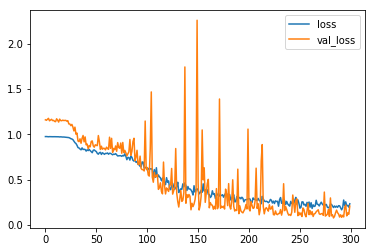

In [462]:
plt.plot(train_log.history["loss"], label="loss")
plt.plot(train_log.history["val_loss"], label="val_loss")
plt.legend()

In [463]:
y_pred = model2.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance (i.e, r2) score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.083
Variance (i.e, r2) score: 0.919


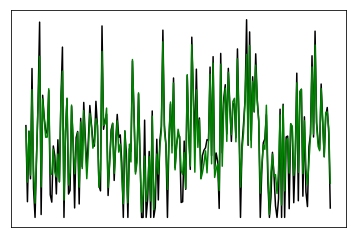

In [464]:
plt.plot(y_test, color="black")
plt.plot(y_pred, color="green")
plt.xticks(())
plt.yticks(())

plt.show()
